In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime

In [2]:
!pip install sodapy


## Import NYC ridership data

The data is from data.ny.gov

In [3]:
#!/usr/bin/env python

import pandas as pd
from sodapy import Socrata

client = Socrata("data.ny.gov",
                  "q2QiJMeQLA1xDuVRvLve8gR2m",
                  username="sirideva4@gmail.com",
                  password="Nycridership2025_")
#dpyzbdjg3he8jkmb7vszyjjsk
# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("vxuj-8kew", limit=2000)

# Convert to pandas DataFrame
rider_df = pd.DataFrame.from_records(results)

In [4]:
# See first few rows
rider_df.head()

# Data types and column names
rider_df.info()

# Summary stats
rider_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1776 entries, 0 to 1775
Data columns (total 15 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   date                                                  1776 non-null   object
 1   subways_total_estimated_ridership                     1776 non-null   object
 2   subways_of_comparable_pre_pandemic_day                1776 non-null   object
 3   buses_total_estimated_ridersip                        1776 non-null   object
 4   buses_of_comparable_pre_pandemic_day                  1776 non-null   object
 5   lirr_total_estimated_ridership                        1776 non-null   object
 6   lirr_of_comparable_pre_pandemic_day                   1776 non-null   object
 7   metro_north_total_estimated_ridership                 1776 non-null   object
 8   metro_north_of_comparable_pre_pandemic_day            1776 non-null 

date subways_total_estimated_ridership  \
count                      1776                              1776   
unique                     1776                              1775   
top     2025-01-09T00:00:00.000                           2519444   
freq                          1                                 2   

       subways_of_comparable_pre_pandemic_day buses_total_estimated_ridersip  \
count                                    1776                           1776   
unique                                    102                           1774   
top                                      0.68                           8912   
freq                                       64                              2   

       buses_of_comparable_pre_pandemic_day lirr_total_estimated_ridership  \
count                                  1776                           1776   
unique                                   76                           1770   
top                                    0.01                          87401   
freq                                    112                              2   

       lirr_of_comparable_pre_pandemic_day  \
count                                 1776   
unique                                 145   
top                                   0.77   
freq                                    41   

       metro_north_total_estimated_ridership  \
count                                   1776   
unique                                  1767   
top                                   131127   
freq                                       2   

       metro_north_of_comparable_pre_pandemic_day  \
count                                        1776   
unique                                        117   
top                                          0.15   
freq                                           55   

       access_a_ride_total_scheduled_trips  \
count                                 1776   
unique                                1725   
top                                  24396   
freq                                     2   

       access_a_ride_of_comparable_pre_pandemic_day  \
count                                          1776   
unique                                          132   
top                                            0.78   
freq                                             48   

       bridges_and_tunnels_total_traffic  \
count                               1776   
unique                              1773   
top                               916246   
freq                                   2   

       bridges_and_tunnels_of_comparable_pre_pandemic_day  \
count                                                1776   
unique                                                 91   
top                                                  0.98   
freq                                                  116   

       staten_island_railway_total_estimated_ridership  \
count                                             1776   
unique                                            1548   
top                                                  0   
freq                                                32   

       staten_island_railway_of_comparable_pre_pandemic_day  
count                                                1776    
unique                                                114    
top                                                  0.44    
freq                                                   81

In [5]:
import pandas as pd

# Convert date column
rider_df['date'] = pd.to_datetime(rider_df['date'])

# Convert relevant columns to numeric (remove commas, convert strings)
cols_to_clean = [
    "subways_total_estimated_ridership",
    "buses_total_estimated_ridersip",
    "lirr_total_estimated_ridership",
    "metro_north_total_estimated_ridership",
    "access_a_ride_total_scheduled_trips",
    "bridges_and_tunnels_total_traffic",
    "staten_island_railway_total_estimated_ridership"
]

for col in cols_to_clean:
    rider_df[col] = rider_df[col].str.replace(",", "").astype(float)

# Optional: rename 'date' to 'ds' and your target series to 'y' for Prophet compatibility
df_subway = rider_df[["date", "subways_total_estimated_ridership"]].rename(
    columns={"date": "ds", "subways_total_estimated_ridership": "y"}
)

df_subway.head()


ds          y
0 2020-03-01  2212965.0
1 2020-03-02  5329915.0
2 2020-03-03  5481103.0
3 2020-03-04  5498809.0
4 2020-03-05  5496453.0

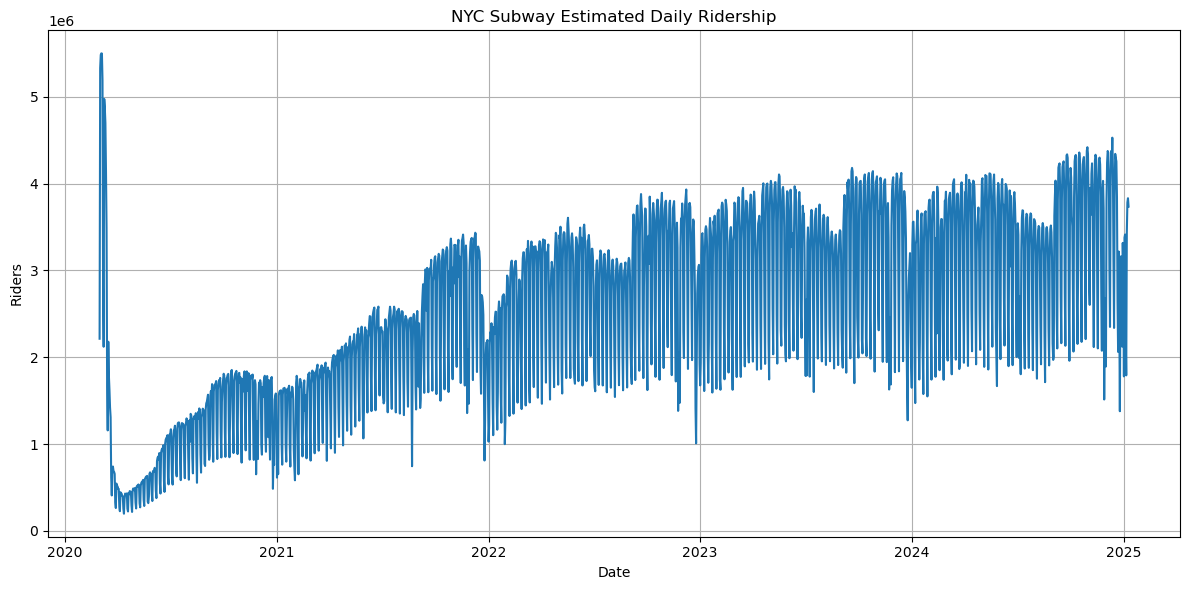

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_subway["ds"], df_subway["y"])
plt.title("NYC Subway Estimated Daily Ridership")
plt.xlabel("Date")
plt.ylabel("Riders")
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
!pip install prophet

18:09:02 - cmdstanpy - INFO - Chain [1] start processing
18:09:04 - cmdstanpy - INFO - Chain [1] done processing


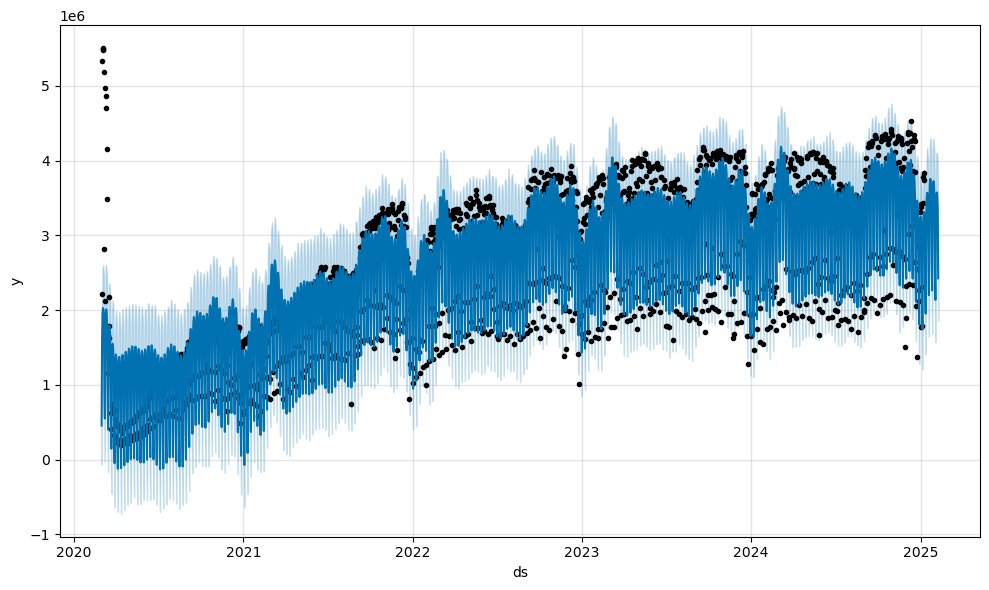

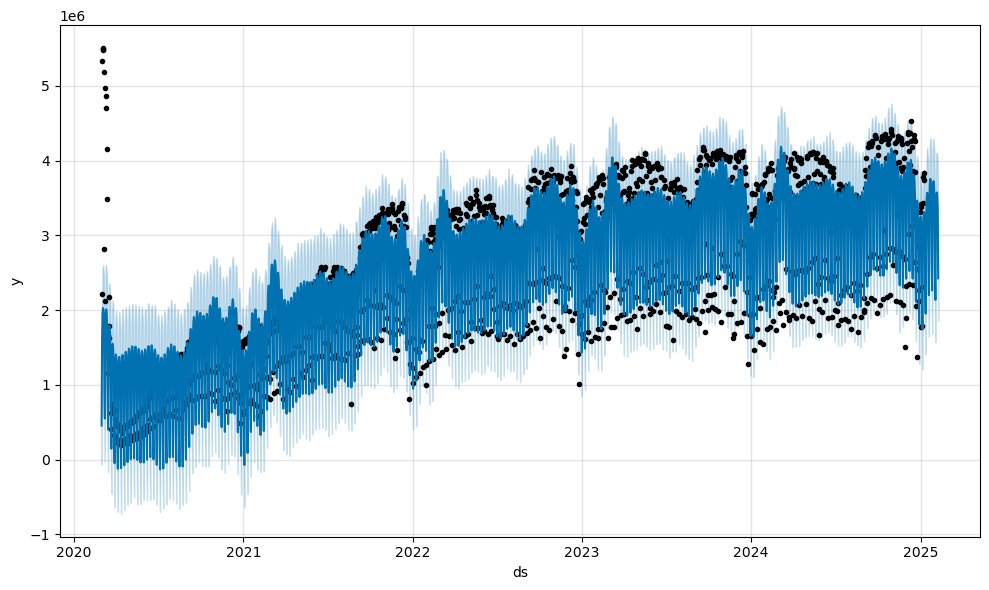

In [8]:

from prophet import Prophet

model = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model.fit(df_subway)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

model.plot(forecast)


In [9]:
model = Prophet()
model.fit(df_subway)

18:09:06 - cmdstanpy - INFO - Chain [1] start processing
18:09:07 - cmdstanpy - INFO - Chain [1] done processing


C:\Users\sirid\AppData\Local\Temp\ipykernel_23892\3299514889.py:37: UserWarning: Glyph 128647 (\N{METRO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\sirid\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128647 (\N{METRO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


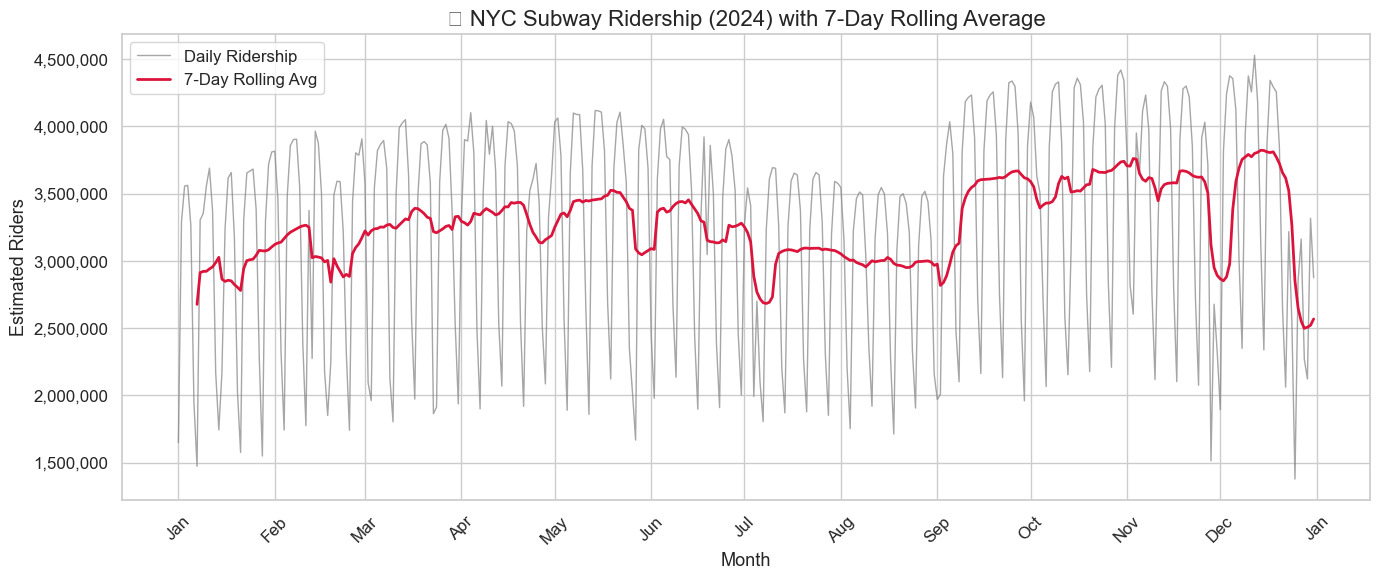

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.ticker as ticker

df_2024 = rider_df[(rider_df['date'] >= '2024-01-01') & (rider_df['date'] <= '2024-12-31')].copy()
df_2024['weekday'] = df_2024['date'].dt.weekday
# Calculate rolling average
df_2024['7day_avg'] = df_2024['subways_total_estimated_ridership'].rolling(7).mean()

# Set up plot
sns.set(style="whitegrid", font_scale=1.1)
fig, ax = plt.subplots(figsize=(14, 6))

# Plot daily ridership in light gray
ax.plot(df_2024['date'], df_2024['subways_total_estimated_ridership'],
        label="Daily Ridership", color="gray", linewidth=1, alpha=0.7)

# Plot 7-day rolling average in crimson
ax.plot(df_2024['date'], df_2024['7day_avg'],
        label="7-Day Rolling Avg", color="crimson", linewidth=2)

# Format x-axis
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Format y-axis
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

# Labels and legend
ax.set_title("ðŸš‡ NYC Subway Ridership (2024) with 7-Day Rolling Average", fontsize=16)
ax.set_xlabel("Month", fontsize=13)
ax.set_ylabel("Estimated Riders", fontsize=13)
ax.legend(loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### This chart visualizes estimated daily NYC subway ridership for 2024, based on MTA data. The gray line shows raw daily ridership, while the red line represents a 7-day rolling average that smooths out weekday/weekend fluctuations and highlights broader trends.

Key Findings:

1. Clear Weekly Seasonality: Ridership dips consistently every weekend, with pronounced weekday peaks.

2. Holiday-Driven Dips: Significant drops in ridership are visible around major U.S. holidays like Independence Day (July 4), Thanksgiving (late November), and Christmas (late December).

3. Summer and Winter Lulls: Ridership slightly declines during the summer months (vacation season) and again in late December, possibly due to holidays and colder weather.

4. Overall Stability: Aside from holiday-related dips, ridership remained relatively steady, averaging between 3.0 to 3.8 million riders per weekday.

## Integrate wheather data 


In [144]:
nyc_wheather = pd.read_csv("C:/UCB/nyc-subway-ridership-forecasting/NYC-subway-ridership-forecasting/NYC_weather.csv")

In [145]:
nyc_wheather.head()

STATION        DATE  ACMH  ACSH  ADPT   ASLP   ASTP  AWBT   AWND  FMTM  \
0  USW00014732  2020-01-01   NaN   NaN  20.0  29.76  29.74  32.0  15.88   NaN   
1  USW00014732  2020-01-02   NaN   NaN  25.0  29.92  29.88  36.0   8.05   NaN   
2  USW00014732  2020-01-03   NaN   NaN  40.0  29.81  29.75  44.0   4.70   NaN   
3  USW00014732  2020-01-04   NaN   NaN  43.0  29.62  29.60  45.0   8.50   NaN   
4  USW00014732  2020-01-05   NaN   NaN  22.0  29.83  29.75  32.0  20.13   NaN   

   ...  WT13  WT14  WT15  WT16  WT17  WT18  WT19  WT21  WT22  WV20  
0  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 54 columns]

In [146]:
nyc_wheather.rename

<bound method DataFrame.rename of           STATION        DATE  ACMH  ACSH  ADPT   ASLP   ASTP  AWBT   AWND  \
0     USW00014732  2020-01-01   NaN   NaN  20.0  29.76  29.74  32.0  15.88   
1     USW00014732  2020-01-02   NaN   NaN  25.0  29.92  29.88  36.0   8.05   
2     USW00014732  2020-01-03   NaN   NaN  40.0  29.81  29.75  44.0   4.70   
3     USW00014732  2020-01-04   NaN   NaN  43.0  29.62  29.60  45.0   8.50   
4     USW00014732  2020-01-05   NaN   NaN  22.0  29.83  29.75  32.0  20.13   
...           ...         ...   ...   ...   ...    ...    ...   ...    ...   
1947  USW00014732  2025-05-01   NaN   NaN   NaN    NaN    NaN   NaN   9.17   
1948  USW00014732  2025-05-02   NaN   NaN   NaN    NaN    NaN   NaN   7.83   
1949  USW00014732  2025-05-03   NaN   NaN   NaN    NaN    NaN   NaN   8.50   
1950  USW00014732  2025-05-04   NaN   NaN   NaN    NaN    NaN   NaN   9.17   
1951  USW00014732  2025-05-05   NaN   NaN   NaN    NaN    NaN   NaN  11.63   

      FMTM  ...  WT13  WT14  

In [147]:
nyc_wheather = nyc_wheather.dropna(axis=1,how='all')

In [148]:
nyc_wheather

STATION        DATE  ADPT   ASLP   ASTP  AWBT   AWND  PGTM  PRCP  \
0     USW00014732  2020-01-01  20.0  29.76  29.74  32.0  15.88   NaN  0.00   
1     USW00014732  2020-01-02  25.0  29.92  29.88  36.0   8.05   NaN  0.00   
2     USW00014732  2020-01-03  40.0  29.81  29.75  44.0   4.70   NaN  0.14   
3     USW00014732  2020-01-04  43.0  29.62  29.60  45.0   8.50   NaN  0.24   
4     USW00014732  2020-01-05  22.0  29.83  29.75  32.0  20.13   NaN  0.00   
...           ...         ...   ...    ...    ...   ...    ...   ...   ...   
1947  USW00014732  2025-05-01   NaN    NaN    NaN   NaN   9.17   NaN  0.00   
1948  USW00014732  2025-05-02   NaN    NaN    NaN   NaN   7.83   NaN  0.00   
1949  USW00014732  2025-05-03   NaN    NaN    NaN   NaN   8.50   NaN  0.00   
1950  USW00014732  2025-05-04   NaN    NaN    NaN   NaN   9.17   NaN  0.13   
1951  USW00014732  2025-05-05   NaN    NaN    NaN   NaN  11.63   NaN  1.18   

      RHAV  ...  WSF2  WSF5  WT01  WT02  WT03  WT04  WT05  WT06  WT08  WT09  
0     49.0  ...  23.0  32.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1     51.0  ...  16.1  23.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2     79.0  ...  12.1  16.1   1.0   NaN   NaN   NaN   NaN   NaN   1.0   NaN  
3     88.0  ...  25.9  32.0   1.0   1.0   NaN   NaN   NaN   NaN   NaN   NaN  
4     51.0  ...  36.9  49.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
...    ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
1947   NaN  ...  16.1  25.1   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN  
1948   NaN  ...  21.0  30.0   1.0   1.0   NaN   NaN   NaN   NaN   1.0   NaN  
1949   NaN  ...  23.0  34.0   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN  
1950   NaN  ...  19.9  28.0   1.0   NaN   NaN   NaN   NaN   NaN   1.0   NaN  
1951   NaN  ...  17.0  25.9   1.0   1.0   NaN   NaN   NaN   NaN   1.0   NaN  

[1952 rows x 29 columns]

In [149]:
nyc_wheather['DATE'] = pd.to_datetime(nyc_wheather['DATE'])
nyc_wheather

C:\Users\sirid\AppData\Local\Temp\ipykernel_23892\2189667326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_wheather['DATE'] = pd.to_datetime(nyc_wheather['DATE'])


STATION       DATE  ADPT   ASLP   ASTP  AWBT   AWND  PGTM  PRCP  \
0     USW00014732 2020-01-01  20.0  29.76  29.74  32.0  15.88   NaN  0.00   
1     USW00014732 2020-01-02  25.0  29.92  29.88  36.0   8.05   NaN  0.00   
2     USW00014732 2020-01-03  40.0  29.81  29.75  44.0   4.70   NaN  0.14   
3     USW00014732 2020-01-04  43.0  29.62  29.60  45.0   8.50   NaN  0.24   
4     USW00014732 2020-01-05  22.0  29.83  29.75  32.0  20.13   NaN  0.00   
...           ...        ...   ...    ...    ...   ...    ...   ...   ...   
1947  USW00014732 2025-05-01   NaN    NaN    NaN   NaN   9.17   NaN  0.00   
1948  USW00014732 2025-05-02   NaN    NaN    NaN   NaN   7.83   NaN  0.00   
1949  USW00014732 2025-05-03   NaN    NaN    NaN   NaN   8.50   NaN  0.00   
1950  USW00014732 2025-05-04   NaN    NaN    NaN   NaN   9.17   NaN  0.13   
1951  USW00014732 2025-05-05   NaN    NaN    NaN   NaN  11.63   NaN  1.18   

      RHAV  ...  WSF2  WSF5  WT01  WT02  WT03  WT04  WT05  WT06  WT08  WT09  
0     49.0  ...  23.0  32.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1     51.0  ...  16.1  23.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2     79.0  ...  12.1  16.1   1.0   NaN   NaN   NaN   NaN   NaN   1.0   NaN  
3     88.0  ...  25.9  32.0   1.0   1.0   NaN   NaN   NaN   NaN   NaN   NaN  
4     51.0  ...  36.9  49.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
...    ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
1947   NaN  ...  16.1  25.1   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN  
1948   NaN  ...  21.0  30.0   1.0   1.0   NaN   NaN   NaN   NaN   1.0   NaN  
1949   NaN  ...  23.0  34.0   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN  
1950   NaN  ...  19.9  28.0   1.0   NaN   NaN   NaN   NaN   NaN   1.0   NaN  
1951   NaN  ...  17.0  25.9   1.0   1.0   NaN   NaN   NaN   NaN   1.0   NaN  

[1952 rows x 29 columns]

In [150]:
nyc_wheather = nyc_wheather.loc[:, nyc_wheather.isnull().mean() < 0.9]

In [151]:
nyc_wheather.columns

Index(['STATION', 'DATE', 'ADPT', 'ASLP', 'ASTP', 'AWBT', 'AWND', 'PRCP',
       'RHAV', 'RHMN', 'RHMX', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'WDF2',
       'WDF5', 'WSF2', 'WSF5', 'WT01', 'WT08'],
      dtype='object')

In [152]:
nyc_wheather.rename(columns={
    'STATION': 'Station_ID',
    'DATE': 'date',
    'ADPT': 'Dew_Point_Temperature',
    'ASLP': 'Sea_Level_Pressure',
    'ASTP': 'Station_Pressure',
    'AWBT': 'Wet_Bulb_Temperature',
    'AWND': 'Avg_Wind_Speed',
    'PRCP': 'Precipitation',
    'RHAV': 'Average_Humidity',
    'RHMN': 'Min_Humidity',
    'RHMX': 'Max_Humidity',
    'SNOW': 'Snowfall',
    'SNWD': 'Snow_Depth',
    'TAVG': 'Avg_Temperature',
    'TMAX': 'Max_Temperature',
    'TMIN': 'Min_Temperature',
    'WDF2': 'Wind_Direction_2min',
    'WDF5': 'Wind_Direction_5sec',
    'WSF2': 'Wind_Speed_2min',
    'WSF5': 'Wind_Speed_5sec',
    'WT01': 'WeatherType_Fog',
    'WT08': 'WeatherType_SmokeOrHaze'
}, inplace=True)


C:\Users\sirid\AppData\Local\Temp\ipykernel_23892\2427175474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_wheather.rename(columns={


In [153]:
nyc_wheather

Station_ID       date  Dew_Point_Temperature  Sea_Level_Pressure  \
0     USW00014732 2020-01-01                   20.0               29.76   
1     USW00014732 2020-01-02                   25.0               29.92   
2     USW00014732 2020-01-03                   40.0               29.81   
3     USW00014732 2020-01-04                   43.0               29.62   
4     USW00014732 2020-01-05                   22.0               29.83   
...           ...        ...                    ...                 ...   
1947  USW00014732 2025-05-01                    NaN                 NaN   
1948  USW00014732 2025-05-02                    NaN                 NaN   
1949  USW00014732 2025-05-03                    NaN                 NaN   
1950  USW00014732 2025-05-04                    NaN                 NaN   
1951  USW00014732 2025-05-05                    NaN                 NaN   

      Station_Pressure  Wet_Bulb_Temperature  Avg_Wind_Speed  Precipitation  \
0                29.74                  32.0           15.88           0.00   
1                29.88                  36.0            8.05           0.00   
2                29.75                  44.0            4.70           0.14   
3                29.60                  45.0            8.50           0.24   
4                29.75                  32.0           20.13           0.00   
...                ...                   ...             ...            ...   
1947               NaN                   NaN            9.17           0.00   
1948               NaN                   NaN            7.83           0.00   
1949               NaN                   NaN            8.50           0.00   
1950               NaN                   NaN            9.17           0.13   
1951               NaN                   NaN           11.63           1.18   

      Average_Humidity  Min_Humidity  ...  Snow_Depth  Avg_Temperature  \
0                 49.0          41.0  ...         0.0               40   
1                 51.0          36.0  ...         0.0               40   
2                 79.0          58.0  ...         0.0               47   
3                 88.0          71.0  ...         0.0               47   
4                 51.0          44.0  ...         0.0               40   
...                ...           ...  ...         ...              ...   
1947               NaN           NaN  ...         0.0               61   
1948               NaN           NaN  ...         0.0               66   
1949               NaN           NaN  ...         0.0               73   
1950               NaN           NaN  ...         0.0               66   
1951               NaN           NaN  ...         0.0               59   

      Max_Temperature  Min_Temperature  Wind_Direction_2min  \
0                  42               35                  290   
1                  49               34                  230   
2                  49               45                  230   
3                  50               41                  320   
4                  41               36                  310   
...               ...              ...                  ...   
1947               70               52                  160   
1948               84               55                  170   
1949               87               62                  220   
1950               70               61                  180   
1951               64               56                   50   

      Wind_Direction_5sec  Wind_Speed_2min  Wind_Speed_5sec  WeatherType_Fog  \
0                   270.0             23.0             32.0              NaN   
1                   220.0             16.1             23.0              NaN   
2                   230.0             12.1             16.1              1.0   
3                   330.0             25.9             32.0              1.0   
4                   320.0             36.9             49.0              NaN   
...                   ...      

In [164]:
nyc_weather = nyc_wheather.copy()
nyc_weather['date'] = pd.to_datetime(nyc_weather['date'])
print(type(nyc_weather['date'][0]))
type(rider_df['date'][0])

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


pandas._libs.tslibs.timestamps.Timestamp

In [165]:
rider_df = rider_df.merge(nyc_wheather, on='date', how='left')

In [80]:
rider_df = rider_df.merge(filtered_weather, on='date', how='left')

In [166]:
rider_df

date  subways_total_estimated_ridership  \
0    2020-03-01                          2212965.0   
1    2020-03-02                          5329915.0   
2    2020-03-03                          5481103.0   
3    2020-03-04                          5498809.0   
4    2020-03-05                          5496453.0   
...         ...                                ...   
1771 2025-01-05                          1791020.0   
1772 2025-01-06                          3436491.0   
1773 2025-01-07                          3781536.0   
1774 2025-01-08                          3830616.0   
1775 2025-01-09                          3734383.0   

     subways_of_comparable_pre_pandemic_day  buses_total_estimated_ridersip  \
0                                      0.97                        984908.0   
1                                      0.96                       2209066.0   
2                                      0.98                       2228608.0   
3                                      0.99                       2177165.0   
4                                      0.99                       2244515.0   
...                                     ...                             ...   
1771                                   0.86                        618750.0   
1772                                   0.67                       1238969.0   
1773                                   0.74                       1275936.0   
1774                                   0.74                       1256260.0   
1775                                   0.73                        787710.0   

     buses_of_comparable_pre_pandemic_day  lirr_total_estimated_ridership  \
0                                    0.99                         86790.0   
1                                    0.99                        321569.0   
2                                    0.99                        319727.0   
3                                    0.97                        311662.0   
4                                    1.00                        307597.0   
...                                   ...                             ...   
1771                                 0.67                         96683.0   
1772                                 0.61                        229503.0   
1773                                 0.62                        245930.0   
1774                                 0.61                        239444.0   
1775                                 0.38                        229804.0   

     lirr_of_comparable_pre_pandemic_day  \
0                                   1.00   
1                                   1.03   
2                                   1.02   
3                                   0.99   
4                                   0.98   
...                                  ...   
1771                                1.17   
1772                                0.76   
1773                                0.81   
1774                                0.79   
1775                                0.76   

      metro_north_total_estimated_ridership  \
0                                   55825.0   
1                                  180701.0   
2                                  190648.0   
3                                  192689.0   
4                                  194386.0   
...                                     ...   
1771                                79761.0   
1772                               202575.0   
1773                               220945.0   
1774                               209550.0   
1775                               198894.0   

     metro_north_of_comparable_pre_pandemic_day  \
0                                          0.59   
1                                          0.66   
2                                          0.69   
3                                          0.70   
4                                          0.70   
...                                         ...   
1771                                 

## Integrate events data

In [171]:
from pandas.tseries.holiday import USFederalHolidayCalendar

calendar = USFederalHolidayCalendar()
holidays = calendar.holidays(start=rider_df['date'].min(), end=rider_df['date'].max())
rider_df['is_holiday'] = rider_df['date'].isin(holidays).astype(int)


In [174]:
rider_df.columns

Index(['date', 'subways_total_estimated_ridership',
       'subways_of_comparable_pre_pandemic_day',
       'buses_total_estimated_ridersip',
       'buses_of_comparable_pre_pandemic_day',
       'lirr_total_estimated_ridership', 'lirr_of_comparable_pre_pandemic_day',
       'metro_north_total_estimated_ridership',
       'metro_north_of_comparable_pre_pandemic_day',
       'access_a_ride_total_scheduled_trips',
       'access_a_ride_of_comparable_pre_pandemic_day',
       'bridges_and_tunnels_total_traffic',
       'bridges_and_tunnels_of_comparable_pre_pandemic_day',
       'staten_island_railway_total_estimated_ridership',
       'staten_island_railway_of_comparable_pre_pandemic_day', 'is_holiday',
       'STATION', 'NAME', 'DATE', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX',
       'TMIN', 'Station_ID', 'Dew_Point_Temperature', 'Sea_Level_Pressure',
       'Station_Pressure', 'Wet_Bulb_Temperature', 'Avg_Wind_Speed',
       'Precipitation', 'Average_Humidity', 'Min_Humidity', 'Max_Humid

In [175]:
rider_df.head(5)

date  subways_total_estimated_ridership  \
0 2020-03-01                          2212965.0   
1 2020-03-02                          5329915.0   
2 2020-03-03                          5481103.0   
3 2020-03-04                          5498809.0   
4 2020-03-05                          5496453.0   

  subways_of_comparable_pre_pandemic_day  buses_total_estimated_ridersip  \
0                                   0.97                        984908.0   
1                                   0.96                       2209066.0   
2                                   0.98                       2228608.0   
3                                   0.99                       2177165.0   
4                                   0.99                       2244515.0   

  buses_of_comparable_pre_pandemic_day  lirr_total_estimated_ridership  \
0                                 0.99                         86790.0   
1                                 0.99                        321569.0   
2                                 0.99                        319727.0   
3                                 0.97                        311662.0   
4                                 1.00                        307597.0   

  lirr_of_comparable_pre_pandemic_day  metro_north_total_estimated_ridership  \
0                                1.00                                55825.0   
1                                1.03                               180701.0   
2                                1.02                               190648.0   
3                                0.99                               192689.0   
4                                0.98                               194386.0   

  metro_north_of_comparable_pre_pandemic_day  \
0                                       0.59   
1                                       0.66   
2                                       0.69   
3                                       0.70   
4                                       0.70   

   access_a_ride_total_scheduled_trips  ... Snow_Depth  Avg_Temperature  \
0                              19922.0  ...        0.0               32   
1                              30338.0  ...        0.0               45   
2                              32767.0  ...        0.0               53   
3                              34297.0  ...        0.0               51   
4                              33209.0  ...        0.0               46   

  Max_Temperature  Min_Temperature Wind_Direction_2min  Wind_Direction_5sec  \
0              44               26                 300                310.0   
1              56               38                 180                190.0   
2              59               49                 300                300.0   
3              57               46                 290                260.0   
4              52               40                 320                320.0   

  Wind_Speed_2min Wind_Speed_5sec WeatherType_Fog  WeatherType_SmokeOrHaze  
0            23.9            30.0             NaN                      NaN  
1            18.1            25.9             NaN                      NaN  
2            32.0            38.9             1.0                      1.0  
3            33.1            47.0             NaN                      NaN  
4            25.1            32.0             NaN                      NaN  

[5 rows x 46 columns]

In [176]:
keep_cols = [
    'date',  # main date for merging/temporal analysis
    'subways_total_estimated_ridership',
    'buses_total_estimated_ridersip',
    'lirr_total_estimated_ridership',
    'metro_north_total_estimated_ridership',
    'access_a_ride_total_scheduled_trips',
    'bridges_and_tunnels_total_traffic',
    'staten_island_railway_total_estimated_ridership',
    'is_holiday',

    # Core weather features
    'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN',
    'Dew_Point_Temperature', 'Sea_Level_Pressure',
    'Station_Pressure', 'Wet_Bulb_Temperature', 'Avg_Wind_Speed',
    'Average_Humidity', 'Min_Humidity', 'Max_Humidity',
    'Wind_Direction_2min', 'Wind_Direction_5sec',
    'Wind_Speed_2min', 'Wind_Speed_5sec',
    'WeatherType_Fog', 'WeatherType_SmokeOrHaze','subways_of_comparable_pre_pandemic_day',
    'buses_of_comparable_pre_pandemic_day',
    'lirr_of_comparable_pre_pandemic_day',
    'metro_north_of_comparable_pre_pandemic_day',
    'access_a_ride_of_comparable_pre_pandemic_day',
    'bridges_and_tunnels_of_comparable_pre_pandemic_day',
    'staten_island_railway_of_comparable_pre_pandemic_day'
]

drop_cols = ['STATION', 'NAME', 'DATE', 'Station_ID',
    'Precipitation', 'Snowfall', 'Snow_Depth',
    'Avg_Temperature', 'Max_Temperature', 'Min_Temperature'
]

In [178]:
rider_df_cleaned = rider_df[keep_cols].copy()

In [179]:
rider_df_cleaned


date  subways_total_estimated_ridership  \
0    2020-03-01                          2212965.0   
1    2020-03-02                          5329915.0   
2    2020-03-03                          5481103.0   
3    2020-03-04                          5498809.0   
4    2020-03-05                          5496453.0   
...         ...                                ...   
1771 2025-01-05                          1791020.0   
1772 2025-01-06                          3436491.0   
1773 2025-01-07                          3781536.0   
1774 2025-01-08                          3830616.0   
1775 2025-01-09                          3734383.0   

      buses_total_estimated_ridersip  lirr_total_estimated_ridership  \
0                           984908.0                         86790.0   
1                          2209066.0                        321569.0   
2                          2228608.0                        319727.0   
3                          2177165.0                        311662.0   
4                          2244515.0                        307597.0   
...                              ...                             ...   
1771                        618750.0                         96683.0   
1772                       1238969.0                        229503.0   
1773                       1275936.0                        245930.0   
1774                       1256260.0                        239444.0   
1775                        787710.0                        229804.0   

      metro_north_total_estimated_ridership  \
0                                   55825.0   
1                                  180701.0   
2                                  190648.0   
3                                  192689.0   
4                                  194386.0   
...                                     ...   
1771                                79761.0   
1772                               202575.0   
1773                               220945.0   
1774                               209550.0   
1775                               198894.0   

      access_a_ride_total_scheduled_trips  bridges_and_tunnels_total_traffic  \
0                                 19922.0                           786960.0   
1                                 30338.0                           874619.0   
2                                 32767.0                           882175.0   
3                                 34297.0                           905558.0   
4                                 33209.0                           929298.0   
...                                   ...                                ...   
1771                              23665.0                           726411.0   
1772                              35840.0                           792617.0   
1773                              38048.0                           842968.0   
1774                              39406.0                           852748.0   
1775                              38431.0                           869256.0   

      staten_island_railway_total_estimated_ridership  is_holiday  PRCP  ...  \
0                                              1636.0           0   NaN  ...   
1                                             17140.0           0   NaN  ...   
2                                             17453.0           0   NaN  ...   
3                                             17136.0           0   NaN  ...   
4                                             17203.0           0   NaN  ...   
...                                               ...         ...   ...  ...   
1771                                           2039.0           0   NaN  ...   
1772                                           6887.0           0   NaN  ...   
1773                                           7409.0           0   NaN  ...   
1774                                           7798.0           0   NaN  ...   
1775                                           6841.0           0   NaN  ...   

      Wind

In [180]:
target = 'subways_total_estimated_ridership'


In [181]:
ts_df = rider_df_cleaned[['date', 'subways_total_estimated_ridership']].copy()
ts_df['date'] = pd.to_datetime(ts_df['date'])
ts_df.set_index('date', inplace=True)
ts_df = ts_df.sort_index()

# Check for missing dates
full_range = pd.date_range(start=ts_df.index.min(), end=ts_df.index.max(), freq='D')
ts_df = ts_df.reindex(full_range)

# Optional: Fill missing ridership values (e.g., with interpolation or forward fill)
ts_df['subways_total_estimated_ridership'] = ts_df['subways_total_estimated_ridership'].interpolate()


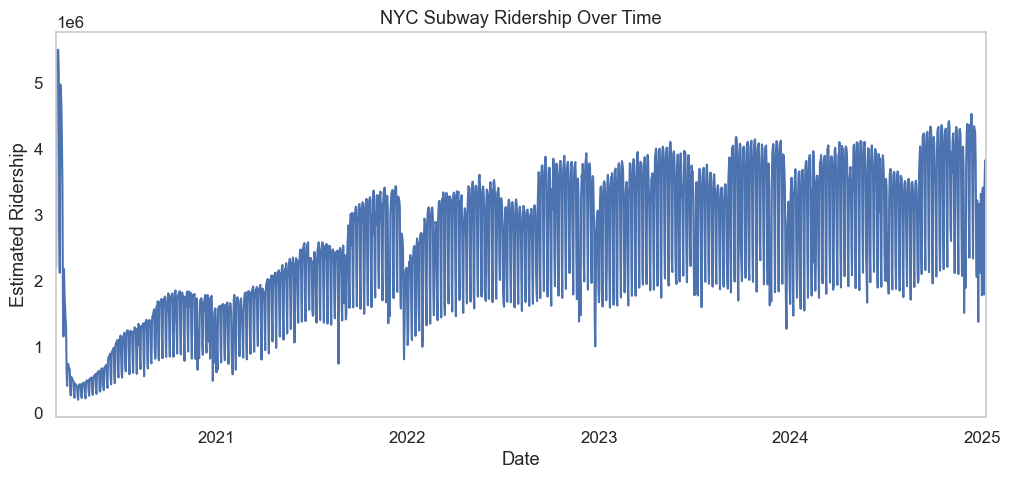

In [182]:
ts_df['subways_total_estimated_ridership'].plot(figsize=(12,5), title='NYC Subway Ridership Over Time')
plt.ylabel('Estimated Ridership')
plt.xlabel('Date')
plt.grid()
plt.show()


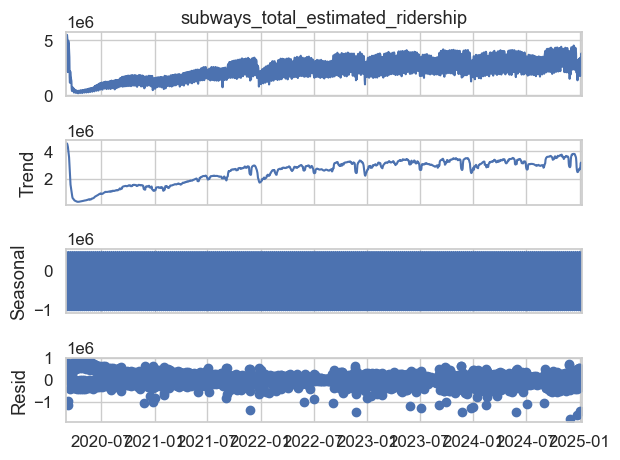

In [183]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(ts_df['subways_total_estimated_ridership'], model='additive', period=7)
decomp.plot()
plt.tight_layout()
plt.show()


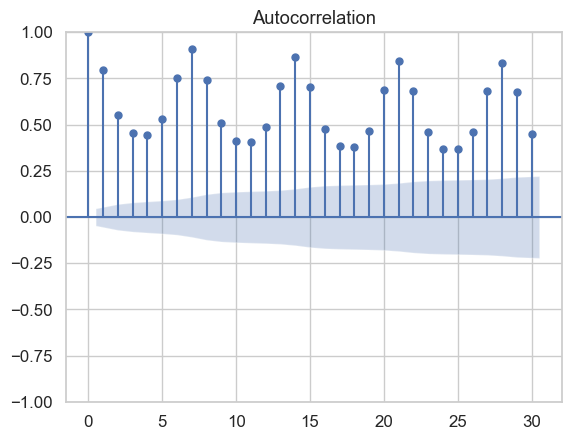

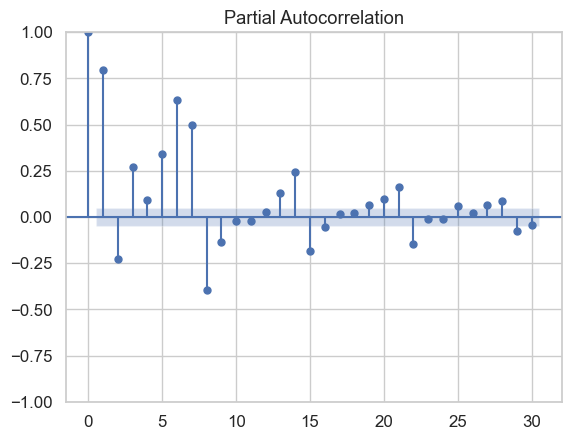

In [184]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_df['subways_total_estimated_ridership'].dropna(), lags=30)
plot_pacf(ts_df['subways_total_estimated_ridership'].dropna(), lags=30)
plt.show()


In [185]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(ts_df['subways_total_estimated_ridership'], order=(7,1,1))  # update (p,d,q) based on ACF/PACF
model_fit = model.fit()
print(model_fit.summary())


C:\Users\sirid\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                                       SARIMAX Results                                       
Dep. Variable:     subways_total_estimated_ridership   No. Observations:                 1776
Model:                                ARIMA(7, 1, 1)   Log Likelihood              -25116.410
Date:                               Fri, 01 Aug 2025   AIC                          50250.820
Time:                                       16:37:36   BIC                          50300.154
Sample:                                   03-01-2020   HQIC                         50269.043
                                        - 01-09-2025                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0873      0.038     -2.315      0.021      -0.161      -0.013
ar.L2      

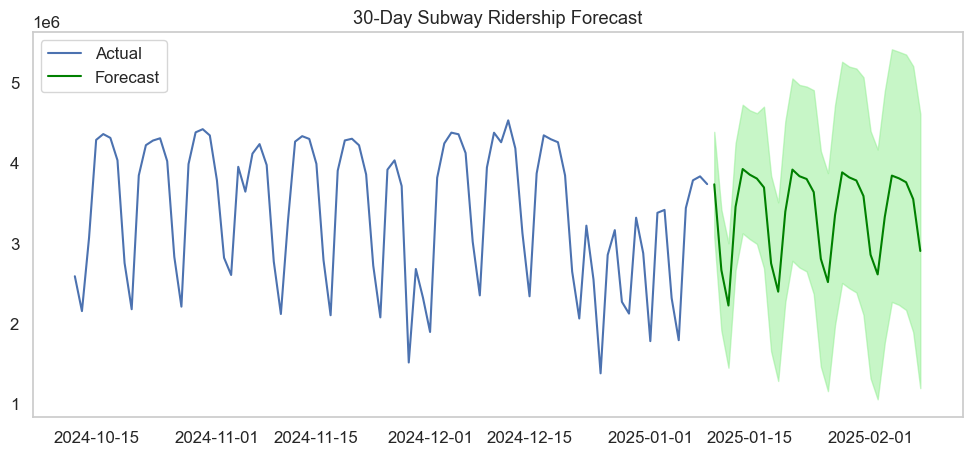

In [186]:
forecast = model_fit.get_forecast(steps=30)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot
plt.figure(figsize=(12,5))
plt.plot(ts_df.index[-90:], ts_df['subways_total_estimated_ridership'][-90:], label='Actual')
plt.plot(predicted_mean.index, predicted_mean, label='Forecast', color='green')
plt.fill_between(predicted_mean.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='lightgreen', alpha=0.5)
plt.legend()
plt.title('30-Day Subway Ridership Forecast')
plt.grid()
plt.show()


### Multivariate Time - Series

In [188]:
df = rider_df_cleaned.copy()

# Convert date
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Time features
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['day'] = df['date'].dt.day
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

# Fill missing weather values if any
weather_cols = ['TMAX', 'TMIN', 'PRCP', 'SNOW', 'WeatherType_Fog', 'WeatherType_SmokeOrHaze']
df[weather_cols] = df[weather_cols].ffill()

# Final features for modeling
features = ['is_holiday', 'TMAX', 'TMIN', 'PRCP', 'SNOW', 
            'WeatherType_Fog', 'WeatherType_SmokeOrHaze',
            'day_of_week', 'month', 'year', 'day', 'is_weekend']
target = 'subways_total_estimated_ridership'


In [189]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)


In [192]:
pip install xgboost 

   ---------------------------------------- 0.0/149.9 MB ? eta -:--:--
    --------------------------------------- 3.1/149.9 MB 19.1 MB/s eta 0:00:08
   -- ------------------------------------- 11.0/149.9 MB 30.4 MB/s eta 0:00:05
   ---- ----------------------------------- 18.4/149.9 MB 32.3 MB/s eta 0:00:05
   ------ --------------------------------- 23.3/149.9 MB 30.2 MB/s eta 0:00:05
   -------- ------------------------------- 31.2/149.9 MB 32.1 MB/s eta 0:00:04
   ---------- ----------------------------- 37.7/149.9 MB 31.9 MB/s eta 0:00:04
   ------------ --------------------------- 45.1/149.9 MB 32.7 MB/s eta 0:00:04
   -------------- ------------------------- 53.0/149.9 MB 33.3 MB/s eta 0:00:03
   ---------------- ----------------------- 60.6/149.9 MB 33.7 MB/s eta 0:00:03
   ----------------- ---------------------- 67.4/149.9 MB 33.7 MB/s eta 0:00:03
   -------------------- ------------------- 75.8/149.9 MB 34.4 MB/s eta 0:00:03
   ---------------------- ----------------- 84.1/1

In [193]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [194]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}, R2 Score: {r2:.2f}")


MAE: 180616.50, R2 Score: 0.92


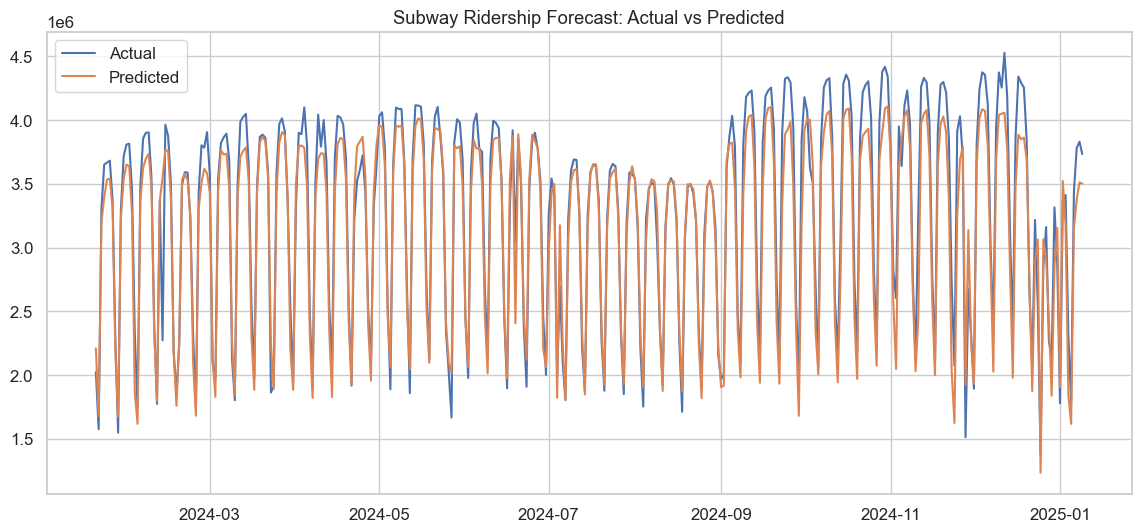

In [195]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df['date'].iloc[-len(y_test):], y_test, label='Actual')
plt.plot(df['date'].iloc[-len(y_test):], y_pred, label='Predicted')
plt.legend()
plt.title('Subway Ridership Forecast: Actual vs Predicted')
plt.show()
